Importing dataset and making the dataframe

In [1]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
import pandas as pd
arff_data = arff.loadarff('bone-marrow.arff')
df = pd.DataFrame(arff_data[0])
#type(df)
#dir(df)

Getting info about dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    object 
 1   Stemcellsource        187 non-null    object 
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    object 
 4   IIIV                  187 non-null    object 
 5   Gendermatch           187 non-null    object 
 6   DonorABO              187 non-null    object 
 7   RecipientABO          187 non-null    object 
 8   RecipientRh           187 non-null    object 
 9   ABOmatch              187 non-null    object 
 10  CMVstatus             187 non-null    object 
 11  DonorCMV              187 non-null    object 
 12  RecipientCMV          187 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    object 
 15  Txpostrelapse         1

Plotting the dataset

In [3]:
df.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [4]:
df.tail()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
182,b'1',b'1',37.575342,b'1',b'1',b'0',b'1',b'1',b'0',b'0',...,b'1',11.08,2.522750,4.39,44.0,15.0,22.0,16.0,385.0,1.0
183,b'0',b'1',22.895890,b'0',b'0',b'0',b'1',b'0',b'1',b'1',...,b'1',4.64,1.038858,4.47,44.5,12.0,30.0,1000000.0,634.0,1.0
184,b'0',b'1',27.347945,b'0',b'1',b'0',b'1',b'-1',b'1',b'1',...,b'1',7.73,1.635559,4.73,33.0,16.0,16.0,1000000.0,1895.0,0.0
185,b'1',b'1',27.780822,b'0',b'1',b'0',b'1',b'0',b'1',b'1',...,b'0',15.41,8.077770,1.91,24.0,13.0,14.0,54.0,382.0,1.0
186,b'1',b'1',55.553425,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'1',9.91,0.948135,10.45,37.0,18.0,20.0,1000000.0,1109.0,0.0


In [5]:
df.shape

(187, 37)

Checking and handling the NaN datas

In [6]:
df.isnull() 

df.isna().values.any()

df.isna().sum()

rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

    Recipientgender Stemcellsource   Donorage Donorage35  IIIV Gendermatch  \
7              b'1'           b'0'  21.435616       b'0'  b'1'        b'0'   
81             b'1'           b'1'  22.112329       b'0'  b'0'        b'0'   
86             b'1'           b'0'  33.791781       b'0'  b'0'        b'1'   
92             b'0'           b'1'  30.835616       b'0'  b'1'        b'0'   
102            b'0'           b'1'  40.183562       b'1'  b'1'        b'0'   

    DonorABO RecipientABO RecipientRh ABOmatch  ... extcGvHD CD34kgx10d6  \
7       b'0'         b'1'        b'1'     b'1'  ...     b'?'        6.41   
81      b'1'        b'-1'        b'0'     b'1'  ...     b'?'        7.91   
86     b'-1'         b'1'        b'1'     b'1'  ...     b'1'        1.38   
92      b'0'         b'0'        b'1'     b'0'  ...     b'0'       34.10   
102     b'0'         b'0'        b'1'     b'0'  ...     b'?'        9.28   

    CD3dCD34 CD3dkgx10d8 Rbodymass ANCrecovery PLTrecovery  \
7        NaN

Checking the duplicated datas

In [7]:
df.duplicated().values.any()

False

Filling the NaN values with mean values

In [8]:
[df['CD3dkgx10d8'].mean(),
df['CD3dCD34'].mean(),
df['Rbodymass'].mean()]


missing_values = {'CD3dkgx10d8' : df['CD3dkgx10d8'].mean(),
                  'CD3dCD34': df['CD3dCD34'].mean(),
                  'Rbodymass' : df['Rbodymass'].mean()#                  
}

df.fillna(value=missing_values, inplace = True)


Checking how it worked

In [9]:
df.isna().sum()

rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Recipientgender, Stemcellsource, Donorage, Donorage35, IIIV, Gendermatch, DonorABO, RecipientABO, RecipientRh, ABOmatch, CMVstatus, DonorCMV, RecipientCMV, Disease, Riskgroup, Txpostrelapse, Diseasegroup, HLAmatch, HLAmismatch, Antigen, Alel, HLAgrI, Recipientage, Recipientage10, Recipientageint, Relapse, aGvHDIIIIV, extcGvHD, CD34kgx10d6, CD3dCD34, CD3dkgx10d8, Rbodymass, ANCrecovery, PLTrecovery, time_to_aGvHD_III_IV, survival_time, survival_status]
Index: []

[0 rows x 37 columns]


Plotting

<Axes: xlabel='CD3dkgx10d8', ylabel='survival_time'>

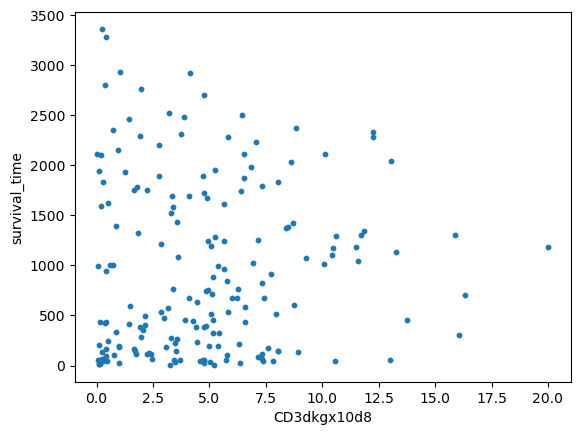

In [10]:
df.plot.scatter(x = 'CD3dkgx10d8', y = 'survival_time', s = 10)

<Axes: xlabel='survival_status', ylabel='survival_time'>

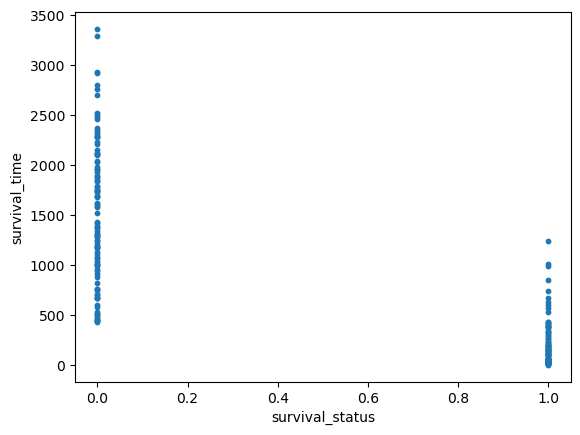

In [11]:
df.plot.scatter(x = 'survival_status', y = 'survival_time', s = 10)

In [12]:
df[df['survival_status'] == 0]['survival_time'].mean()

1527.7254901960785

In [13]:
df[df['survival_status'] == 1]['survival_time'].mean()

231.96470588235294

<Axes: xlabel='CD3dkgx10d8', ylabel='survival_time'>

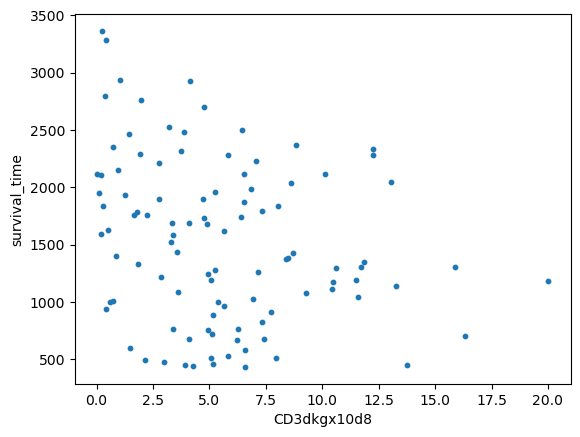

In [14]:
df_deceased = df[df['survival_status'] == 0]

df_deceased.plot.scatter(x = 'CD3dkgx10d8', y = 'survival_time', s = 10)

<Axes: xlabel='CD3dkgx10d8', ylabel='survival_time'>

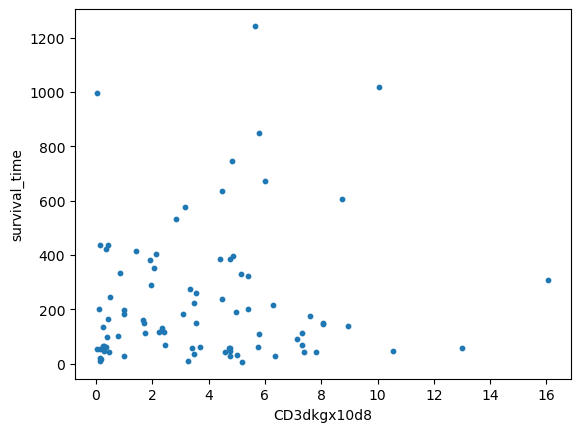

In [15]:
df_alive = df[df['survival_status'] == 1]

df_alive.plot.scatter(x = 'CD3dkgx10d8', y = 'survival_time', s = 10)

<Axes: ylabel='Frequency'>

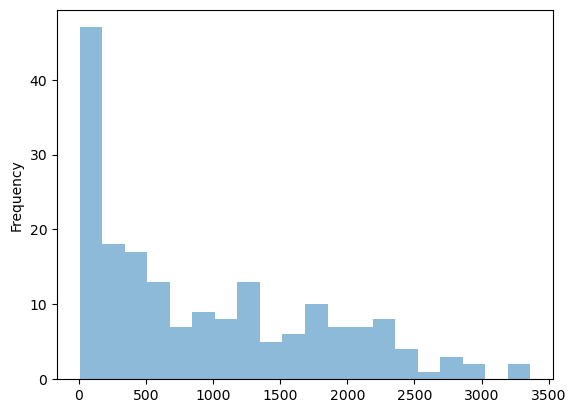

In [16]:
df['survival_time'].plot.hist(bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

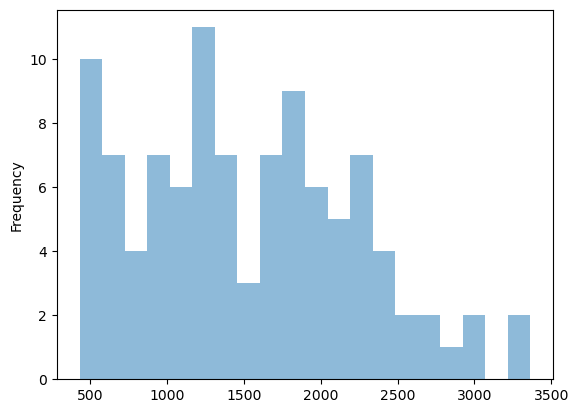

In [17]:
df_deceased['survival_time'].plot.hist(bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

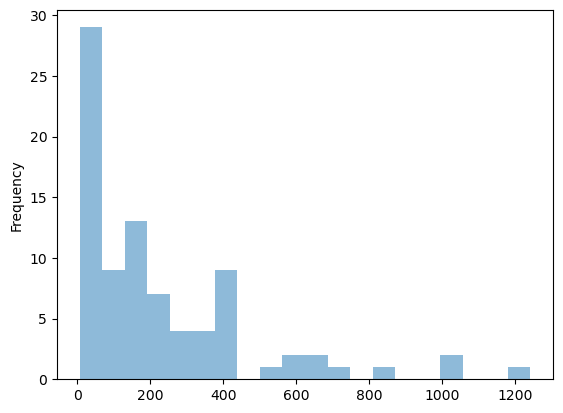

In [18]:
df_alive['survival_time'].plot.hist(bins=20, alpha=0.5)

In [19]:
df.describe()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,8.271826,5.305639,9.914386,9.468822,3.806905,19.544986,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,5.350000,1.809375,1.725000,19.250000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,33.550685,9.600000,9.720000,2.780611,4.470000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,40.117809,14.050000,15.415000,5.771418,6.575000,50.300000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


Mean of coefficients: -0.018598718224535973
Standard deviation of coefficients: 0.037247863860283906
Mean Squared Error: 14.513542860086037


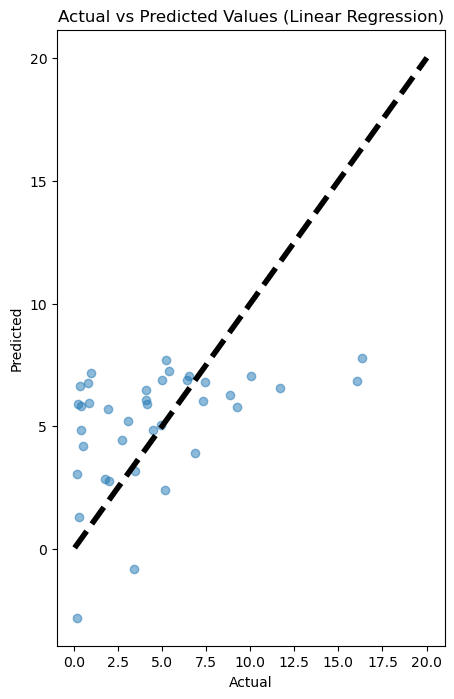

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

target_column = 'CD3dkgx10d8'
y = df[target_column]
feature_column = ['survival_time', 'ANCrecovery', 'time_to_aGvHD_III_IV', 'Rbodymass', 'PLTrecovery']
X = df[feature_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients_linear_regression = model.coef_
coefficients_mean_linear_regression = np.mean(coefficients_linear_regression)
coefficients_std_linear_regression = np.std(coefficients_linear_regression)

print("Mean of coefficients:", coefficients_mean_linear_regression)
print("Standard deviation of coefficients:", coefficients_std_linear_regression)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(5,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.show()



Mean Squared Error (Ridge): 14.513503172195607


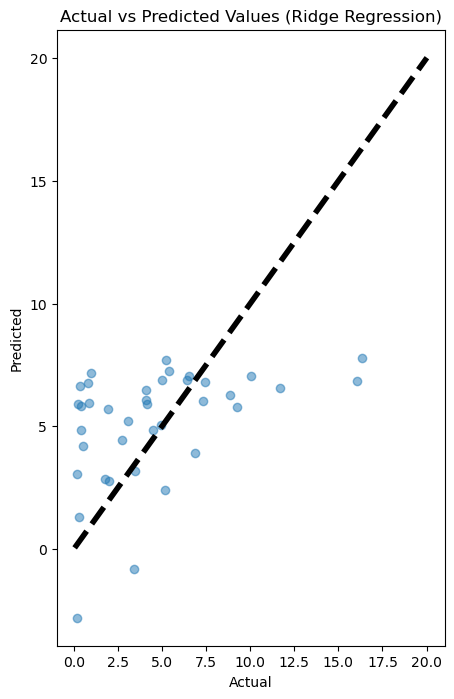

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


target_column = 'CD3dkgx10d8'
y = df[target_column]
feature_column = ['survival_time', 'ANCrecovery', 'time_to_aGvHD_III_IV', 'Rbodymass', 'PLTrecovery']
X = df[feature_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0) 

ridge_model.fit(X_train, y_train)



y_pred = ridge_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge):", mse)


plt.figure(figsize=(5, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.show()
           



Mean Squared Error (Lasso): 14.51828547323385


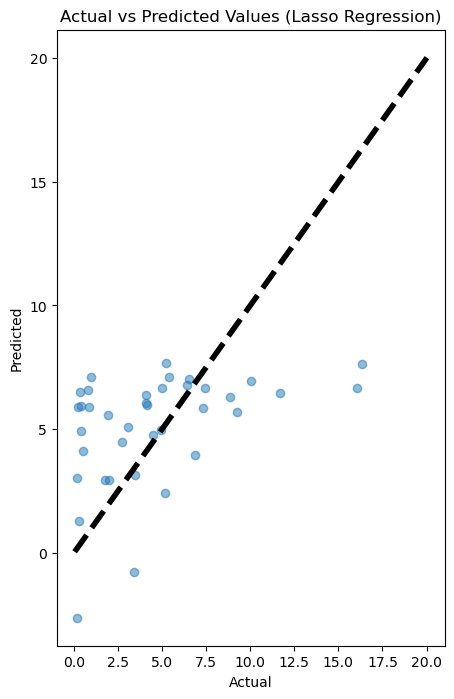

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


target_column = 'CD3dkgx10d8'
y = df[target_column]
feature_column = ['survival_time', 'ANCrecovery', 'time_to_aGvHD_III_IV', 'Rbodymass']
X = df[feature_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso_model = Lasso(alpha=1.0)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)



mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso):", mse)



y_pred_train = lasso_model.predict(X_train)


plt.figure(figsize=(5, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) 
plt.show()






In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error

target_column = 'CD3dkgx10d8'
y = df[target_column]
feature_column = ['survival_time', 'ANCrecovery', 'time_to_aGvHD_III_IV', 'Rbodymass']
X = df[feature_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)

linear_regression_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)


ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)


mae_linear_regression = mean_absolute_error(y_test, y_pred)
rmse_linear_regression = np.sqrt(mean_squared_error(y_test, y_pred))
r2_linear_regression = r2_score(y_test, y_pred)
#msle_linear_regression = mean_squared_log_error(y_test, y_pred)
median_absolute_error_linear_regression = median_absolute_error(y_test, y_pred)


mae_ridge = mean_absolute_error(y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))
r2_ridge = r2_score(y_test, ridge_pred)
#msle_ridge = mean_squared_log_error(y_test, ridge_pred)
median_absolute_error_ridge = median_absolute_error(y_test, ridge_pred)

mae_lasso = mean_absolute_error(y_test, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))
r2_lasso = r2_score(y_test, lasso_pred)
#msle_lasso = mean_squared_log_error(y_test, lasso_pred)
median_absolute_error_lasso = median_absolute_error(y_test, lasso_pred)

print("Linear Regression Metrics:")
print("MAE:", mae_linear_regression)
print("RMSE:", rmse_linear_regression)
print("R2:", r2_linear_regression)
#print("MSLE:", msle_linear_regression)
print("Median Absolute Error:", median_absolute_error_linear_regression)


print("\nRidge Regression Metrics:")
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)
print("R2:", r2_ridge)
#print("MSLE:", msle_ridge)
print("Median Absolute Error:", median_absolute_error_ridge)


print("\nLasso Regression Metrics:")
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)
print("R2:", r2_lasso)
#print("MSLE:", msle_lasso)
print("Median Absolute Error:", median_absolute_error_lasso)




Linear Regression Metrics:
MAE: 3.069707048424028
RMSE: 3.8102867967167313
R2: 0.13649303444556204
Median Absolute Error: 2.6448765922745987

Ridge Regression Metrics:
MAE: 3.0816041530481018
RMSE: 3.8181333810937885
R2: 0.13293290516526657
Median Absolute Error: 2.670418198434949

Lasso Regression Metrics:
MAE: 3.069707048424028
RMSE: 3.8102867967167313
R2: 0.13649303444556204
Median Absolute Error: 2.6448765922745987


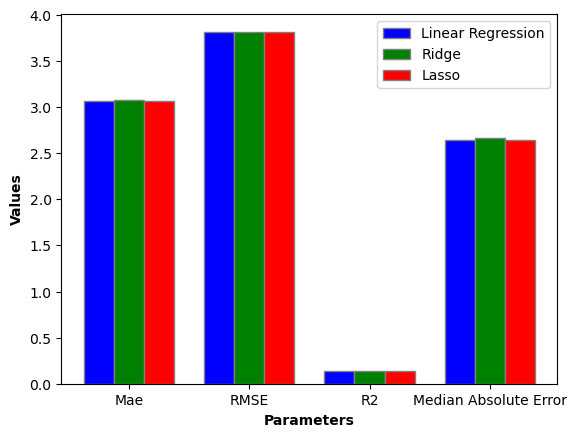

In [47]:
import matplotlib.pyplot as plt

parameters = ['Mae', 'RMSE', 'R2', 'Median Absolute Error']
linear_regression_values = [3.0697, 3.8102, 0.1364, 2.6448]
ridge_values = [3.0816, 3.8181, 0.1329, 2.6704]
lasso_values = [3.0697, 3.8102, 0.1364, 2.6448]

bar_width = 0.25

r1 = range(len(parameters))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, linear_regression_values, color='b', width=bar_width, edgecolor='grey', label='Linear Regression')
plt.bar(r2, ridge_values, color='g', width=bar_width, edgecolor='grey', label='Ridge')
plt.bar(r3, lasso_values, color='r', width=bar_width, edgecolor='grey', label='Lasso')

plt.xlabel('Parameters', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(parameters))], parameters)

plt.legend()
plt.show()